Train shape: (398, 30), Test shape: (171, 30)

Random Forest:
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


 XGBoost:
Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


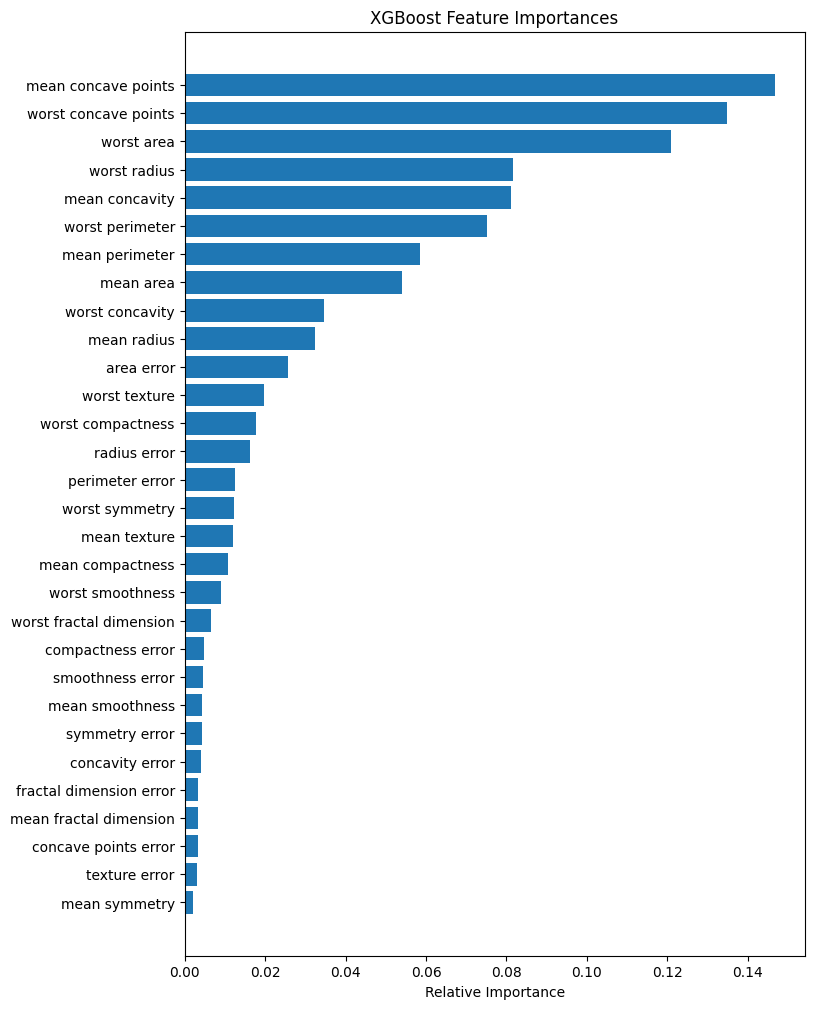


Random Forest Accuracy: 0.9649122807017544
XGBoost Accuracy: 0.9590643274853801


In [3]:

#  1. Imports

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load sample dataset
# We'll use Breast Cancer dataset (binary classification)


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


# 3. Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# 4. XGBoost Model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



# 5. Feature Importance Plot (XGBoost)
importances = xgb.feature_importances_
features = data.feature_names
importances = rf.feature_importances_
features = data.feature_names
# Sort by importance
indices = np.argsort(importances)

plt.figure(figsize=(8, 12))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# 6. Compare side by side
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
